In [90]:
import os

os.environ['CONDA_DEFAULT_ENV']

'toi5671'

https://github.com/soichiro-hattori/unpopular/blob/master/intro-tess_cpm.ipynb

In [1]:
from astroquery.mast import Tesscut

In [2]:
from astroquery.mast.utils import parse_input_location
import os

def check_before_download(coordinates=None, size=5, sector=None, path=".", inflate=True, objectname=None, force_download=False):

    coords = parse_input_location(coordinates, objectname)
    ra = f"{coords.ra.value:.6f}"
    matched = [m for m in os.listdir(path) if ra in m]
    if (len(matched) != 0) and (force_download == False):
        print(f"Found the following FITS files in the \"{path}/\" directory with matching RA values.")
        print(matched)
        print("If you still want to download the file, set the \'force_download\' keyword to True.")
        return matched
    else:
        path_to_FFIs = Tesscut.download_cutouts(coordinates=coordinates, size=size, sector=sector, path=path, inflate=inflate, objectname=objectname)
        print(path_to_FFIs)
        return path_to_FFIs

In [44]:
path_to_FFIs = check_before_download(size=50, objectname="TIC 23863105", 
                                     force_download=True
                                    ) 

Inflating...
                        Local Path                       
---------------------------------------------------------
./tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits
./tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits
./tess-s0050-2-2_211.009466_38.618266_50x50_astrocut.fits


In [46]:
path_to_FFIs[0][0]

'./tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits'

In [37]:
import sys

sys.path.insert(0, '/home/jp/github/research/project/toi5671/unpopular/')

In [47]:
import matplotlib.pyplot as plt
import tess_cpm
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 100

s16 = tess_cpm.Source(path_to_FFIs[0][0], remove_bad=True)

Removing 3 bad data points (out of 1121) using the TESS provided QUALITY array


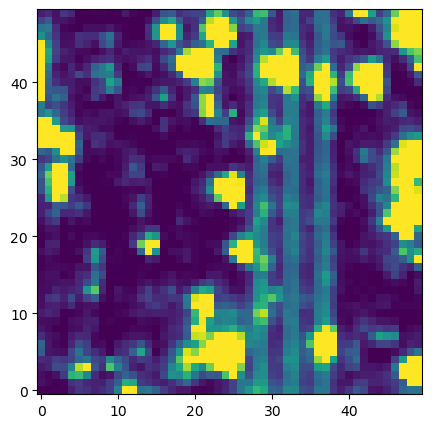

In [48]:
_ = s16.plot_cutout(l=10, h=90)

In [51]:
y1,y2=20, 30 
x1,x2=20, 30

s16.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2]
                )

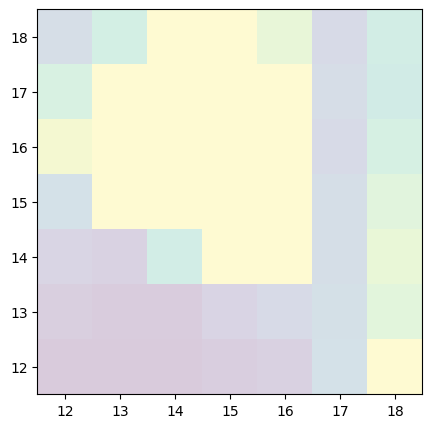

In [9]:
s16.plot_cutout(rowlims=[y1, y2], 
                collims=[x1, x2], 
                show_aperture=True, l=10, h=90);

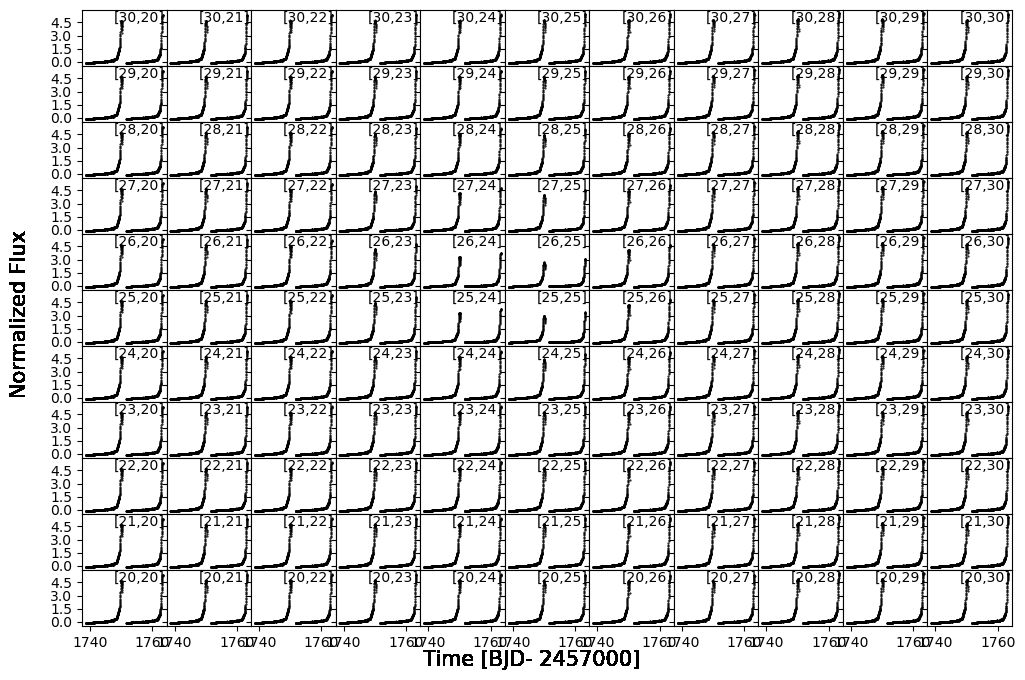

In [52]:
_ = s16.plot_pix_by_pix(data_type="normalized_flux")  

In [53]:
s16.add_cpm_model(exclusion_size=5, n=64, predictor_method="similar_brightness")

In [54]:
len(s16.models), len(s16.models[0])

(11, 11)

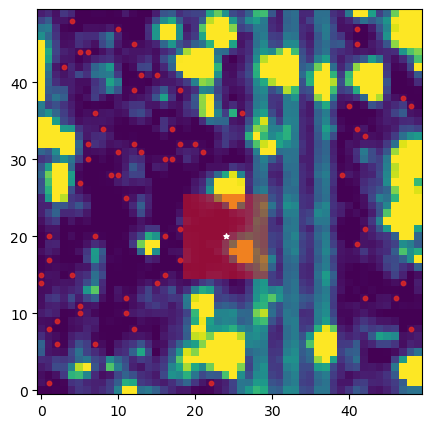

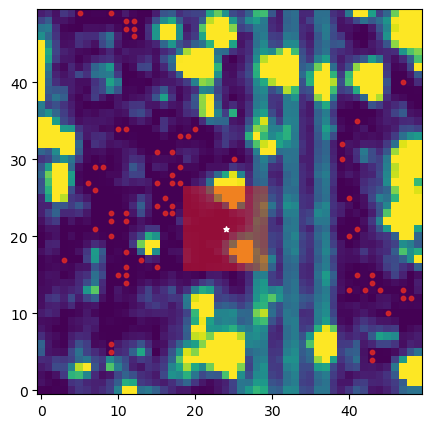

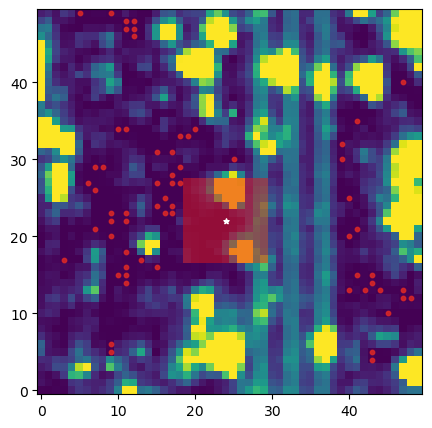

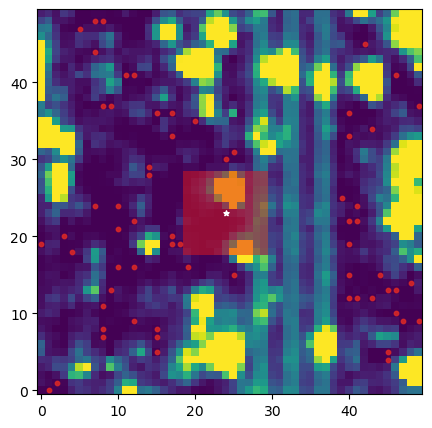

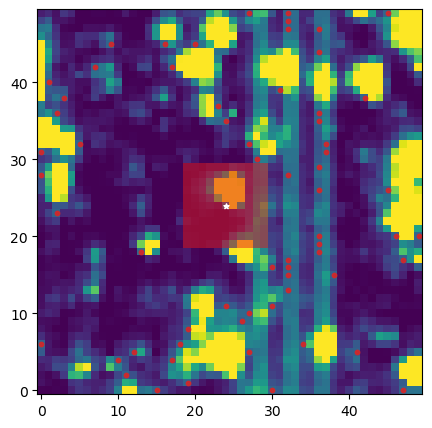

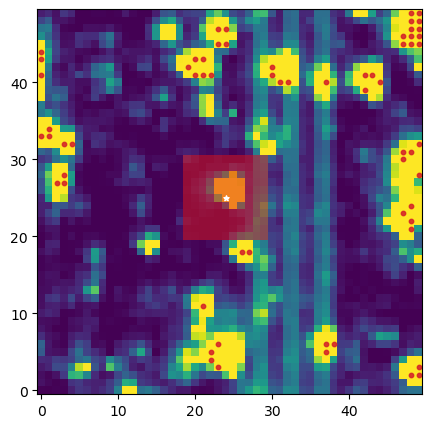

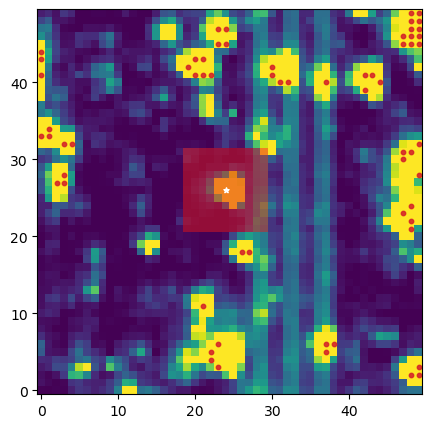

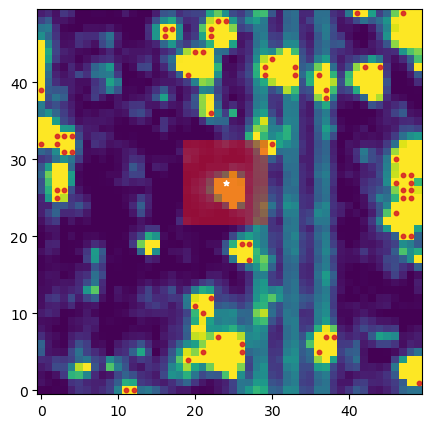

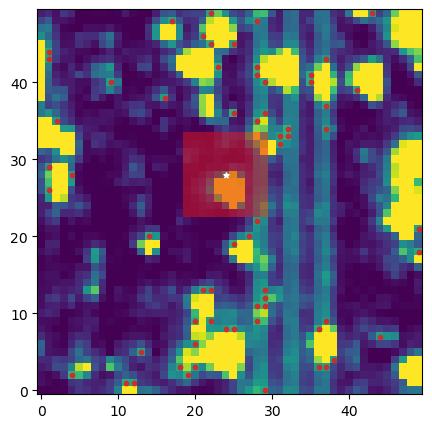

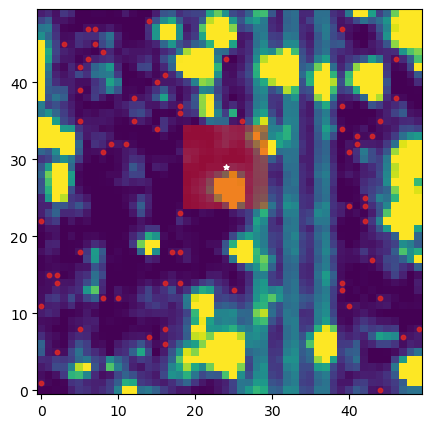

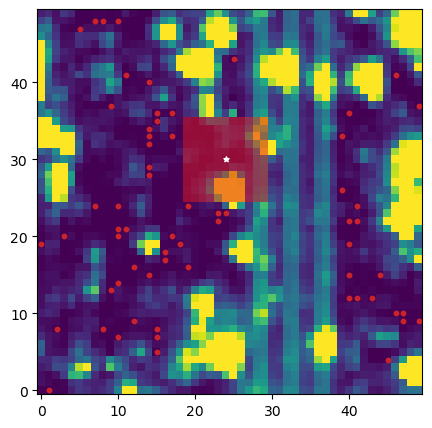

In [55]:
for sm in s16.models:
    _ = sm[4].plot_model(size_predictors=10)  # This method allows us to see our above choices

In [56]:
s16.set_regs([0.1])  # The regularization value(s) need to be passed as a list 

In [57]:
s16.holdout_fit_predict(k=100);

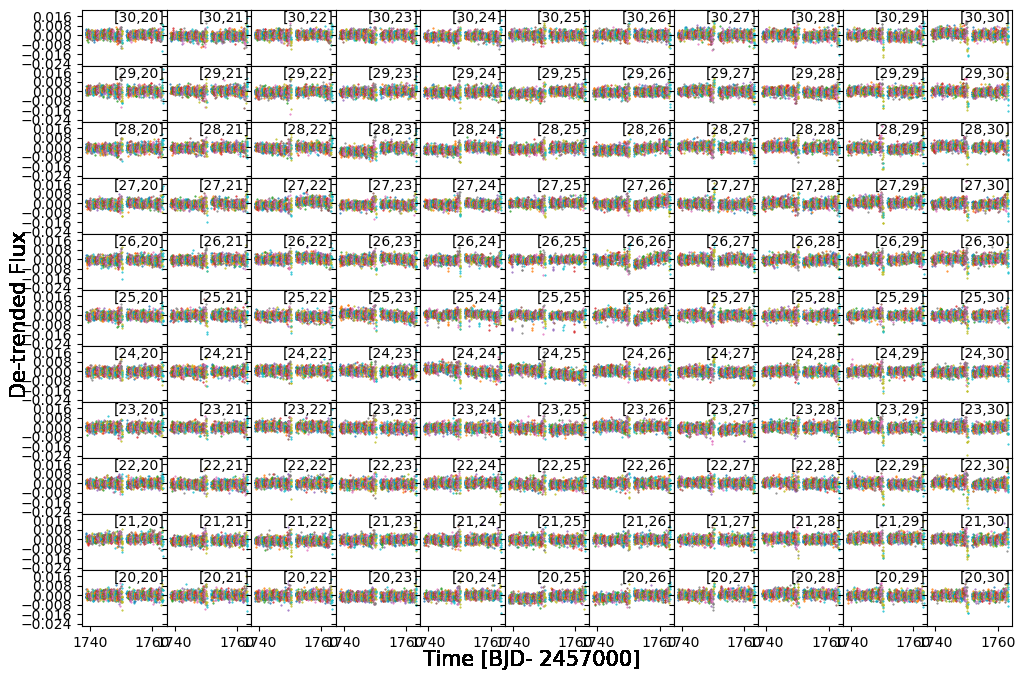

In [58]:
s16.plot_pix_by_pix(data_type="cpm_subtracted_flux", split=True);

Summing over 11 x 11 pixel lightcurves. Weighting=None
Summing over 11 x 11 pixel lightcurves. Weighting=median


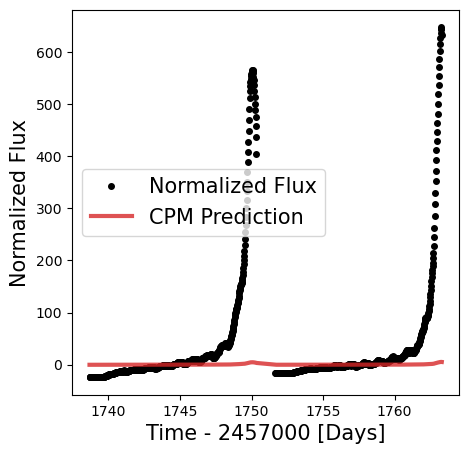

In [59]:
aperture_normalized_flux = s16.get_aperture_lc(data_type="normalized_flux")
aperture_cpm_prediction = s16.get_aperture_lc(data_type="cpm_prediction", weighting="median")
plt.plot(s16.time, aperture_normalized_flux, ".", c="k", ms=8, label="Normalized Flux")
plt.plot(s16.time, aperture_cpm_prediction, "-", lw=3, c="C3", alpha=0.8, label="CPM Prediction")
plt.xlabel("Time - 2457000 [Days]", fontsize=15)
plt.ylabel("Normalized Flux", fontsize=15)
plt.tick_params(labelsize=10)
plt.legend(fontsize=15)

Summing over 11 x 11 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 16')

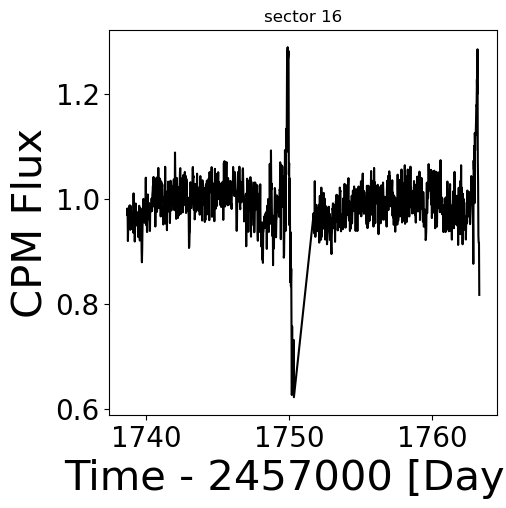

In [79]:
s16_apt_detrended_flux = s16.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s16.time, s16_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 16")

In [61]:
path_to_FFIs[1][0]

'./tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits'

In [62]:
s23 = tess_cpm.Source(path_to_FFIs[1][0], remove_bad=True)

Removing 74 bad data points (out of 1238) using the TESS provided QUALITY array


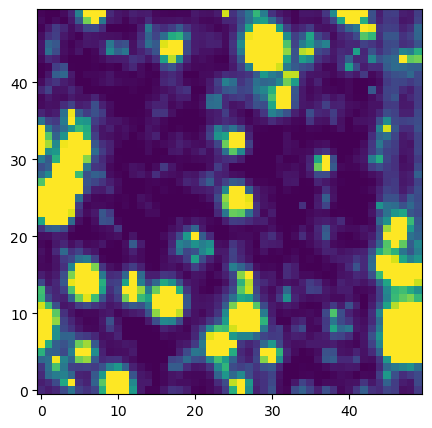

In [63]:
_ = s23.plot_cutout(l=10, h=90)

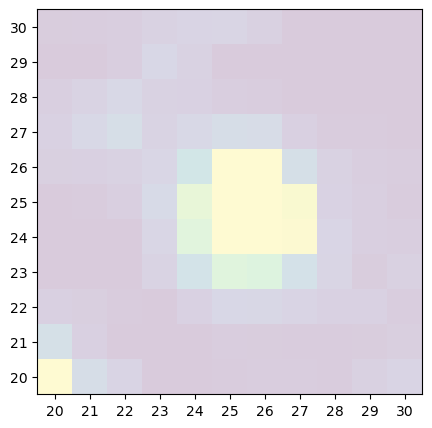

In [64]:
s23.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2])
s23.plot_cutout(rowlims=[y1, y2], 
                collims=[x1, x2], 
                show_aperture=True, l=10, h=90);
s23.add_cpm_model(exclusion_size=5, n=64, predictor_method="similar_brightness")
s23.set_regs([0.1])  # The regularization value(s) need to be passed as a list 
s23.holdout_fit_predict(k=100);

Summing over 11 x 11 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 23')

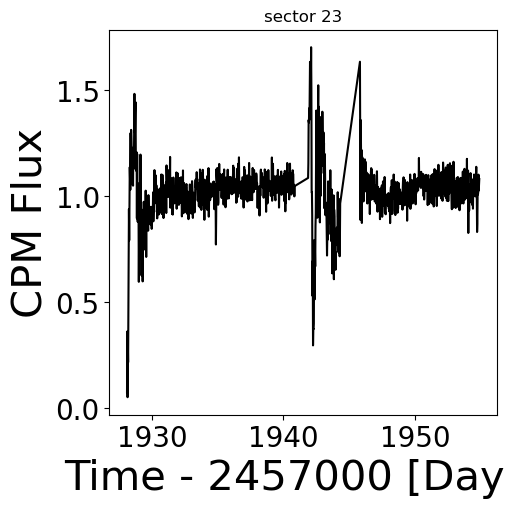

In [80]:
s23_apt_detrended_flux = s23.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s23.time, s23_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 23")

In [66]:
s50 = tess_cpm.Source(path_to_FFIs[2][0], remove_bad=True)

Removing 1209 bad data points (out of 3623) using the TESS provided QUALITY array


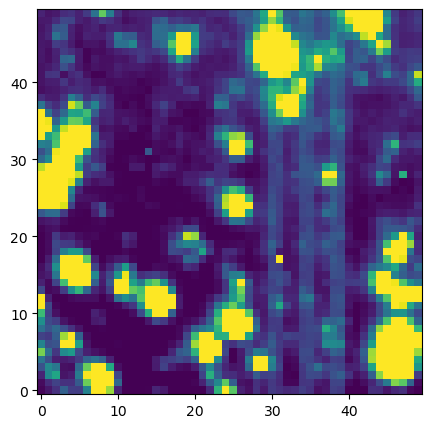

In [67]:
_ = s50.plot_cutout(l=10, h=90)

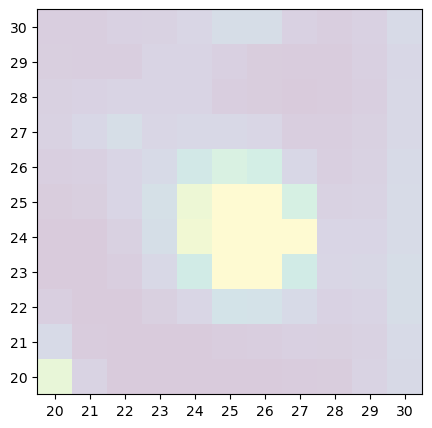

In [69]:
s50.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2])
s50.plot_cutout(rowlims=[y1, y2], 
                collims=[x1, x2], 
                show_aperture=True, l=10, h=90);
s50.add_cpm_model(exclusion_size=5, n=64, predictor_method="similar_brightness")
s50.set_regs([0.1])  # The regularization value(s) need to be passed as a list 
s50.holdout_fit_predict(k=100);

Summing over 11 x 11 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 50')

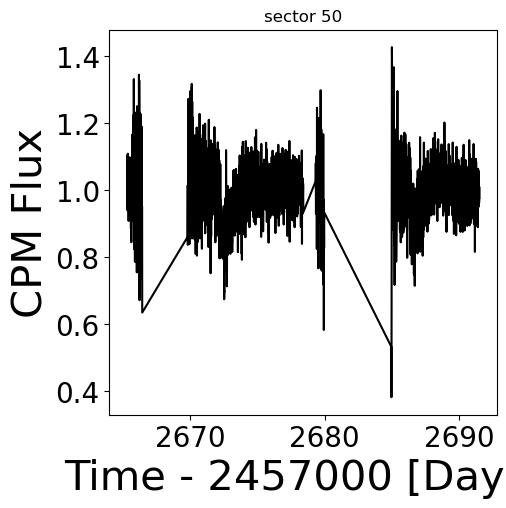

In [81]:
s50_apt_detrended_flux = s50.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s50.time, s50_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 50")

In [71]:
import numpy as np

np.diff(s16.time)*24*60

array([29.97070312, 30.05859375, 29.97070312, ..., 29.97070312,
       30.05859375, 29.97070312])

In [30]:
np.diff(s23.time)*24*60

array([29.97070312, 30.05859375, 29.97070312, ..., 29.97070312,
       30.05859375, 29.97070312])

In [31]:
np.diff(s50.time)*24*60

array([9.99998437, 9.99998403, 9.9999837 , ..., 9.99974766, 9.99974732,
       9.99974665])

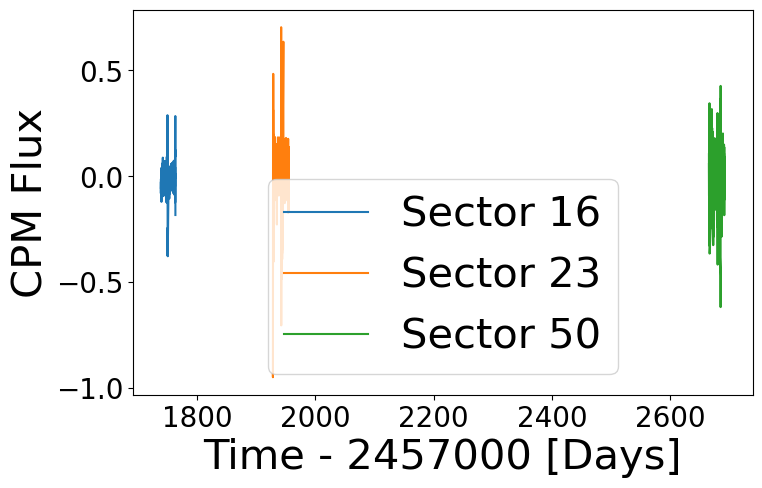

In [82]:
plt.figure(figsize=(8, 5))
plt.plot(s16.time, s16_apt_detrended_flux, c="C0", label="Sector 16")
plt.plot(s23.time, s23_apt_detrended_flux, c="C1", label="Sector 23")
plt.plot(s50.time, s50_apt_detrended_flux, c="C2", label="Sector 50")

plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(fontsize=30)

In [91]:
import pandas as pd

# for s,sector in zip([s16,s23,s50],[16,23,50]):
df = pd.DataFrame(np.c_[s16.time+2457000, 1+s16_apt_detrended_flux, np.ones_like(s16.time)+np.std(s16_apt_detrended_flux)], 
             columns=['time','flux','err']
            )
df

,time,flux,err
0,2.458739e+06,0.969312,1.054217
1,2.458739e+06,0.981443,1.054217
2,2.458739e+06,0.974199,1.054217
3,2.458739e+06,0.919458,1.054217
4,2.458739e+06,0.946711,1.054217
...,...,...,...
1113,2.458763e+06,1.030665,1.054217
1114,2.458763e+06,0.929801,1.054217
1115,2.458763e+06,0.916388,1.054217
1116,2.458763e+06,0.916110,1.054217


In [92]:
df.to_csv('../allesfitter/tess/tess.csv', index=False, header=False)

In [58]:
import lightkurve as lk

In [59]:
res_lc = lk.search_lightcurve(f'TIC 23863105')
res_lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 50,2022,QLP,600,23863105,0.0
1,TESS Sector,2019,DIAMANTE,1800,23863106,0.0


/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=1.00e+00 +/- 1.00e+02); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

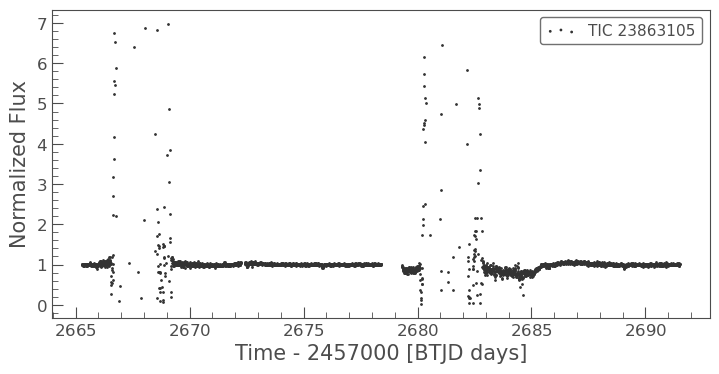

In [62]:
lc_qlp = res_lc[0].download().normalize().remove_outliers()
lc_qlp.scatter()

In [61]:
res_tpf = lk.search_targetpixelfile(f'TIC 23863105')
res_tpf

SearchResult containing 0 data products.